# MODELSKA ANALIZA 1 - 2.naloga

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from scipy.optimize import curve_fit, linprog

plt.rcParams.update({'font.size': 22})

In [93]:
zivila = pd.read_csv('zivila.dat', sep='\t', index_col=False).set_index('zivilo')
print(zivila)
print(zivila.columns.values) # To je numpy array

                 energija[kcal]  mascobe[g]  ogljikovi hidrati[g]  \
zivilo                                                              
Ovseni_kosmici              369        6.10                 64.00   
Jabolko                      52        0.17                 13.81   
Pomfri                       93       12.00                 21.55   
Govedina                    254       20.00                  0.00   
Svinjina                    236       17.99                  0.00   
Piscanec                    114        1.65                  0.00   
Mleko                        60        3.25                  4.52   
Sir_edamec                  357       27.80                  1.43   
Kruh_bel                    266        3.64                 47.51   
Kruh_polnozrnat             247        3.35                 41.29   
Maslo                       717       81.11                  0.06   
Skusa_soljena               305       25.10                  0.00   
Losos                       142   

In [128]:
### OMEJITVE ###

minomejitve = {
    # g
    'minFoodsum':0.,
    # kcal
    'minE':0.,
    # g
    'minFat':70.,
    'minCarb':310.,
    'minPr':50.,
    # mg
    'minCa':1000.,
    'minFe':18.,
    'minC':60.,
    'minK':3500.,
    'minNa':500.,
    # EUR
    'minCENA':0.
}

maxomejitve = {
    # g
    'maxFoodsum':2000.,
    # kcal
    'maxE':9999999,
    # g
    'maxFat':9999999,
    'maxCarb':9999999,
    'maxPr':9999999,
    # mg
    'maxCa':9999999,
    'maxFe':9999999,
    'maxC':9999999,
    'maxK':9999999,
    'maxNa':2400.,
    # EUR
    'maxCENA':9999999.
}

## Prva naloga - Minimizacija koločine kalorij. Pogoji so minimalni PDVji.

In [131]:
# Kar želimo minimizirati
minvar = 'mascobe[g]'

# Vektor c
c = zivila[minvar].values

# Vektor b
b_low = np.array([minomejitve[minomejitev] for minomejitev in minomejitve.keys()])
b_ub = np.array([maxomejitve[maxomejitev] for maxomejitev in maxomejitve.keys()])
b_ub = np.append(-b_low, b_ub)

# Matrika A
A_ub = np.zeros((len(b_ub), len(zivila['energija[kcal]'].values)))

A_ub[0] = -np.ones(len(A_ub[0]))*100
A_ub[11] = np.ones(len(A_ub[0]))*100

for i in range(1, 11):
    A_ub[i] = -zivila[zivila.columns.values[i-1]].values
    A_ub[i+11] = zivila[zivila.columns.values[i-1]].values

print('-------------')
print(b_ub)
print(A_ub)

sol = linprog(c, A_ub, b_ub)
print(sol)

-------------
[-0.000000e+00 -0.000000e+00 -7.000000e+01 -3.100000e+02 -5.000000e+01
 -1.000000e+03 -1.800000e+01 -6.000000e+01 -3.500000e+03 -5.000000e+02
 -0.000000e+00  2.000000e+03  9.999999e+06  9.999999e+06  9.999999e+06
  9.999999e+06  9.999999e+06  9.999999e+06  9.999999e+06  9.999999e+06
  2.400000e+03  9.999999e+06]
[[-1.00e+02 -1.00e+02 -1.00e+02 ... -1.00e+02 -1.00e+02 -1.00e+02]
 [-3.69e+02 -5.20e+01 -9.30e+01 ... -8.40e+01 -8.20e+01 -2.66e+02]
 [-6.10e+00 -1.70e-01 -1.20e+01 ... -0.00e+00 -0.00e+00 -1.00e+01]
 ...
 [ 3.54e+02  1.07e+02  3.91e+02 ...  0.00e+00  0.00e+00  2.34e+02]
 [ 2.86e+02  1.00e+00  2.41e+02 ...  0.00e+00  0.00e+00  5.82e+02]
 [ 1.10e-01  1.50e-01  1.00e-01 ...  6.70e-01  9.00e-01  4.20e-01]]
     con: array([], dtype=float64)
     fun: 70.00000000028521
 message: 'Optimization terminated successfully.'
     nit: 18
   slack: array([1.91421541e+03, 2.68666512e+03, 2.85211854e-10, 1.11434201e+02,
       5.34000460e+01, 4.77943660e+01, 1.51821795e+00, 2.

([<matplotlib.patches.Wedge at 0x1c8060f56a0>,
 [Text(1.0978679890454535, 0.06845347784657921, ''),
  Text(1.0805532011231889, 0.20592420824766974, ''),
  Text(1.055525607925537, 0.30962185164071626, ''),
  Text(1.0401732916857136, 0.357826107577001, ''),
  Text(1.0309032399361, 0.38371670525174134, ''),
  Text(0.9977896880751856, 0.4630504706517681, ''),
  Text(0.9406558711140404, 0.5702337521917534, ''),
  Text(0.8675897042764827, 0.6762308075157811, ''),
  Text(0.746919840581343, 0.8075337465059534, ''),
  Text(0.6055198460946393, 0.9183385628326433, ''),
  Text(0.5250725091326838, 0.9665913615138033, ''),
  Text(0.5041861190682712, 0.977648381238815, ''),
  Text(0.4758998154312484, 0.9917254487369496, ''),
  Text(0.3583905418766804, 1.0399789514664897, ''),
  Text(0.21599460781967683, 1.0785853370933727, ''),
  Text(0.0017782968414922463, 1.0999985625719444, ''),
  Text(-0.2522046680336336, 1.07069734538853, ''),
  Text(-0.4647539163778595, 0.9969973907746407, ''),
  Text(-0.684128

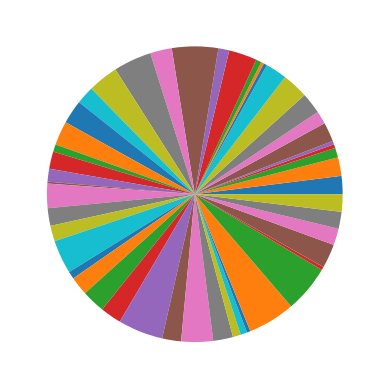

In [132]:
fig, ax = plt.subplots()

ax.pie(sol['x'])